# Proyek Skripsi - Deteksi Kesegaran Pisang Cavendish

Nama: Arya Gunawan

Npm: 2111010028

Judul Skripsi: DETEKSI TINGKAT KESEGARAN BUAH PISANG SEBAGAI UPAYA PENCEGAHAN RISIKO KESEHATAN MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK (CNN) BERBASIS WEBSITE

### Import Semua Packages/Library yang Digunakan

In [1]:
# Instalasi library pendukung
!pip install gdown keras-tuner split-folders -q

# Import semua library yang dibutuhkan
import os, zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import gdown, splitfolders

from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 663.8 kB/s eta 0:00:00


## Data Preparation

Data Loading

*Download dan Ekstraksi Dataset*

In [2]:
# Unduh dataset dari Google Drive
file_id = "1WoBWbnmIDfzOsvVB1gBVZ2GUYGZ8Gxlg"
output_file = "Dataset_Pisang_Cavendish.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

# Ekstrak file zip
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall("Dataset_Pisang")

Downloading...
From (original): https://drive.google.com/uc?id=1WoBWbnmIDfzOsvVB1gBVZ2GUYGZ8Gxlg
From (redirected): https://drive.google.com/uc?id=1WoBWbnmIDfzOsvVB1gBVZ2GUYGZ8Gxlg&confirm=t&uuid=cee36158-a8d8-4de8-bd6a-0378b49548b7
To: /content/Dataset_Pisang_Cavendish.zip
100%|██████████| 336M/336M [00:04<00:00, 75.5MB/s]


*Cek Jumlah Gambar per Kelas*

In [3]:
dataset_path = "Dataset_Pisang/Dataset Pisang Cavendish"
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_path))} images")

matang: 249 images
segar: 264 images
busuk: 261 images
mentah: 256 images


### Pra-Pemrosesan Data (Preprocessing)

In [4]:
# Parameter dasar gambar
img_height, img_width = 150, 150
batch_size = 32

# Inisialisasi ImageDataGenerator dengan normalisasi piksel
datagen = ImageDataGenerator(rescale=1./255)


Split Data

In [5]:
# Membagi dataset menjadi train (70%), val (15%), dan test (15%)
splitfolders.ratio("Dataset_Pisang/Dataset Pisang Cavendish", output="dataset_split",
                   seed=42, ratio=(.7, .15, .15), move=True)

# Load dataset ke dalam generator
train_data = datagen.flow_from_directory(
    "dataset_split/train", target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', shuffle=True
)

val_data = datagen.flow_from_directory(
    "dataset_split/val", target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', shuffle=True
)

test_data = datagen.flow_from_directory(
    "dataset_split/test", target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', shuffle=False
)


Copying files: 1030 files [00:00, 20959.82 files/s]

Found 719 images belonging to 4 classes.
Found 153 images belonging to 4 classes.
Found 158 images belonging to 4 classes.


### Perancangan CNN

In [6]:
# Arsitektur CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Pelatihan dan Validasi Model CNN

In [7]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Konfigurasi callback
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

# Train model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3243 - loss: 1.8239

23/23 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.3275 - loss: 1.8057 - val_accuracy: 0.7386 - val_loss: 0.7530
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6050 - loss: 0.8999

23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6073 - loss: 0.8955 - val_accuracy: 0.8693 - val_loss: 0.4502
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7953 - loss: 0.5090 - val_accuracy: 0.7647 - val_loss: 0.5346
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8695 - loss: 0.3520

23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8697 - loss: 0.3517 - val_accuracy: 0.9542 - val_loss: 0.1853
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8995 - loss: 0.2431

23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9001 - loss: 0.2422 - val_accuracy: 0.9804 - val_loss: 0.0935
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9669 - loss: 0.1099

23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9665 - loss: 0.1104 - val_accuracy: 0.9869 - val_loss: 0.0382
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9658 - loss: 0.1017 - val_accuracy: 0.9739 - val_loss: 0.0898
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9590 - loss: 0.1277 - val_accuracy: 0.9673 - val_loss: 0.0873
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9687 - loss: 0.0692 - val_accuracy: 0.9346 - val_loss: 0.1346
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9409 - loss: 0.1426

23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9417 - loss: 0.1410 - val_accuracy: 0.9869 - val_loss: 0.0334
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9940 - loss: 0.0336 - val_accuracy: 0.9739 - val_loss: 0.0492
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9770 - loss: 0.0452 - val_accuracy: 0.9608 - val_loss: 0.1089
Epoch 13/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9758 - loss: 0.0833

23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9761 - loss: 0.0822 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 14/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9920 - loss: 0.0222

23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9920 - loss: 0.0223 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 15/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9879 - loss: 0.0558 - val_accuracy: 0.9935 - val_loss: 0.0158
Epoch 16/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9789 - loss: 0.0337

23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9793 - loss: 0.0334 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 17/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9978 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 18/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9929 - loss: 0.0198 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 19/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9877 - loss: 0.0445 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 20/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9941 - loss: 0.0180

23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 21/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9985 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 22/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9991 - loss: 0.0096 - val_accuracy: 0.9935 - val_loss: 0.0130
Epoch 23/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9856 - loss: 0.0372 - val_accuracy: 0.9804 - val_loss: 0.0350
Epoch 24/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9830 - loss: 0.0472 - val_accuracy: 1.0000 - val_loss: 0.0119
Epoch 25/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9958 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.0087


### Evaluasi Model

In [8]:
# Evaluasi akurasi pada test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9945 - loss: 0.0176
Test Accuracy: 98.73%


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step


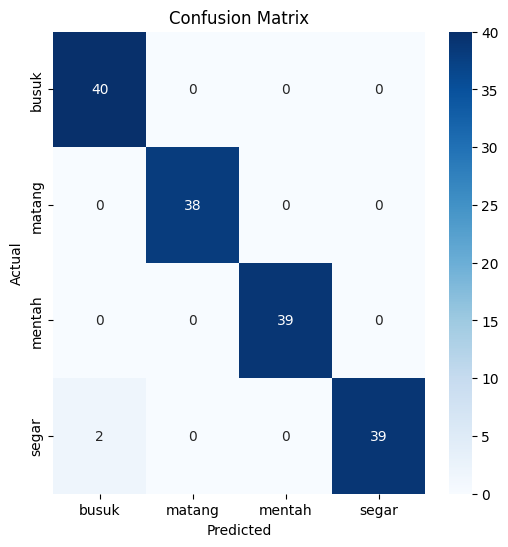

              precision    recall  f1-score   support

       busuk       0.95      1.00      0.98        40
      matang       1.00      1.00      1.00        38
      mentah       1.00      1.00      1.00        39
       segar       1.00      0.95      0.97        41

    accuracy                           0.99       158
   macro avg       0.99      0.99      0.99       158
weighted avg       0.99      0.99      0.99       158



In [9]:
# Prediksi dan evaluasi lanjutan
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=test_data.class_indices,
            yticklabels=test_data.class_indices, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=list(test_data.class_indices.keys())))


Simpan Model

In [10]:
model.save("model_pisang.h5")

Visualisasi Akurasi

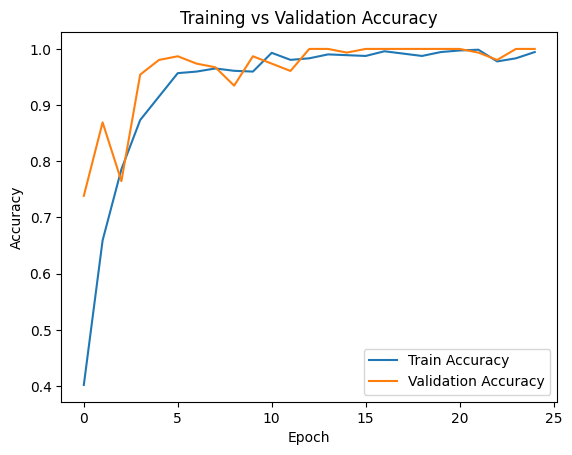

In [11]:
# Visualisasi kurva akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
